# Make figures to compare morphological properties of nuclei between spheroids and suspended MDCK for Figure 4b
Data: calculated morphological properties of spheroids and suspended MDCK

## Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = 'Helvetica'
plt.rcParams["font.size"] = 8

## Input data

In [2]:
# spheroids
adhering_1 = pd.read_csv('../result/spheroid_on_on_1_props.csv', index_col=0)
adhering_2 = pd.read_csv('../result/spheroid_on_on_2_props.csv', index_col=0)
adhering_3 = pd.read_csv('../result/spheroid_on_on_3_props.csv', index_col=0)
adhering = pd.concat([adhering_1, adhering_2, adhering_3])

# suspended
suspended = pd.read_csv('../result/suspended_1_props.csv', index_col=0)

In [3]:
adhering

,label,Volume,Major axis length,Minor axis length,Solidity,bbox-0,bbox-1,bbox-2,bbox-3,bbox-4,bbox-5,Aspect ratio,Surface area,Surface-to-Volume
0,1,374.611296,10.730286,7.456664,0.873563,3,68,462,12,75,470,1.439020,206.513526,0.551274
1,2,392.684648,15.961105,5.598292,0.694767,4,265,1646,17,272,1657,2.851067,318.153286,0.810200
2,3,430.474384,13.249179,7.529018,0.826498,5,37,2536,16,44,2544,1.759749,230.978870,0.536568
3,4,425.545288,14.192149,7.752184,0.396631,5,31,2535,20,44,2543,1.830729,367.214077,0.862926
4,5,469.907152,14.761476,6.791127,0.752632,5,39,766,17,45,776,2.173641,284.235433,0.604876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654,1655,359.824008,15.637125,5.491536,0.776596,35,176,220,45,183,230,2.847495,235.210354,0.653682
1655,1656,596.420616,13.656268,8.710250,0.850117,35,244,1142,42,253,1153,1.567839,254.563907,0.426819
1656,1657,933.242176,19.479946,9.848698,0.647662,37,158,786,46,171,802,1.977921,540.945667,0.579641
1657,1658,345.036720,11.495979,7.209577,0.786517,37,167,216,44,175,226,1.594543,225.134459,0.652494


In [4]:
suspended

,label,Volume,Major axis length,Minor axis length,Solidity,bbox-0,bbox-1,bbox-2,bbox-3,bbox-4,bbox-5,Aspect ratio,Surface area,Surface-to-Volume
0,1,990.748296,22.101438,8.034173,0.867626,4,64,1222,22,72,1232,2.750929,406.053621,0.409845
1,2,1674.249608,20.752196,10.326527,0.849875,5,296,2004,22,310,2014,2.009601,679.930398,0.406111
2,3,2198.376816,21.244662,13.169931,0.844164,6,294,648,23,307,662,1.613119,818.844179,0.372477
3,4,902.024568,17.214967,9.145383,0.884058,8,271,2362,21,278,2372,1.882367,290.690281,0.322264
4,5,790.298392,15.771847,9.937795,0.795041,8,271,660,21,280,670,1.587057,423.827488,0.536288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22678,22679,915.168824,13.369004,10.496530,0.898387,36,409,869,47,418,879,1.273659,321.630324,0.351444
22679,22680,882.308184,17.471685,9.863027,0.868932,36,434,795,49,443,805,1.771432,368.562614,0.417725
22680,22681,568.489072,13.695385,6.564006,0.891753,36,464,1185,47,470,1196,2.086437,265.356765,0.466775
22681,22682,1274.992832,16.874721,10.447095,0.866071,37,200,247,49,214,257,1.615255,535.356148,0.419890


In [6]:
res = pd.concat([suspended, adhering])

In [9]:
res['Condition'] = np.concatenate([np.repeat('Suspended', len(suspended)), np.repeat('Adhering', len(adhering))])

In [18]:
res_filtered = res[res['Volume']<4000]

In [19]:
print(len(res_filtered[res_filtered['Condition']=='Suspended']))
print(len(res_filtered[res_filtered['Condition']=='Adhering']))

22648
13358


In [48]:
plt.rcParams["font.family"] = 'Arial'

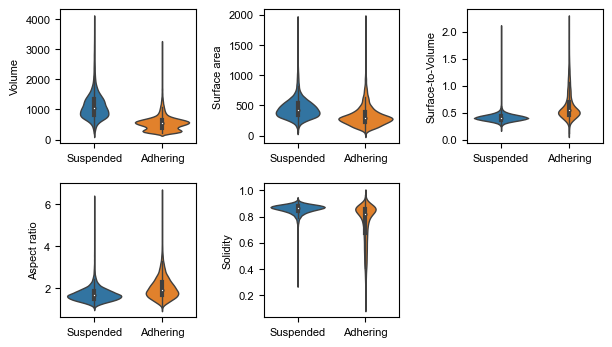

In [55]:
ig, axes = plt.subplots(2, 3, figsize=(7, 4))
axes = axes.flatten()

columns = ['Volume', 'Surface area', 'Surface-to-Volume', 'Aspect ratio', 'Solidity']

for i, ax in enumerate(axes):
    if i == 5:
        axes[i].set_axis_off()
    else:
        sns.violinplot(data=res_filtered, x='Condition', y=columns[i], linewidth=1, ax=ax)
        axes[i].set_xlabel('')

plt.subplots_adjust(wspace=0.5, hspace=0.3)
plt.savefig('../result/result_nucleus.pdf', bbox_inches='tight', pad_inches=0.05)